In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_parquet('../Data/parquet/australian_user_reviews.parquet')

In [4]:
df.head(5)

,item_id,helpful,recommend,review,new_posted,sentiment_analysis
0,1250,No ratings yet,True,Simple yet with great replayability. in my opi...,2011-11-05,2
1,22200,No ratings yet,True,Its unique and worth a playthrough.,2011-07-15,2
2,43110,No ratings yet,True,Great atmosphere. the gunplay can be a bit chu...,2011-04-21,2
3,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014-06-24,2
4,227300,0 of 1 people (0%) found this review helpful,True,For a simple its actually not all that simple ...,2013-09-08,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59280 entries, 0 to 59332
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   item_id             59280 non-null  object        
 1   helpful             59280 non-null  object        
 2   recommend           59280 non-null  bool          
 3   review              59280 non-null  object        
 4   new_posted          59280 non-null  datetime64[ns]
 5   sentiment_analysis  59280 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 2.8+ MB


In [6]:
df.isnull().sum()

item_id               0
helpful               0
recommend             0
review                0
new_posted            0
sentiment_analysis    0
dtype: int64

In [9]:
df.describe()

,new_posted,sentiment_analysis
count,59280,59280.000000
mean,2014-08-17 13:22:38.380566784,1.450186
min,2010-10-16 00:00:00,0.000000
25%,2014-02-20 00:00:00,1.000000
50%,2014-07-17 00:00:00,2.000000
75%,2015-03-13 00:00:00,2.000000
max,2015-12-31 00:00:00,2.000000
std,NaN,0.765081


In [11]:
analisis = df['sentiment_analysis'].describe()
analisis

count    59280.000000
mean         1.450186
std          0.765081
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sentiment_analysis, dtype: float64

En resumen estadístico para la columna 'sentiment_analysis' muestra información útil sobre la distribución de los datos:

- Count: Hay 59,280 observaciones en total en esta columna.
- Mean: La media (promedio) de la columna es aproximadamente 1.45.
- Std: La desviación estándar de los datos es aproximadamente 0.77.
- Min: El valor mínimo en la columna es 0.
- 25%: El primer cuartil (25th percentile) es 1.
- 50%: La mediana (50th percentile) es 2.
- 75%: El tercer cuartil (75th percentile) es 2.
- Max: El valor máximo en la columna es 2.

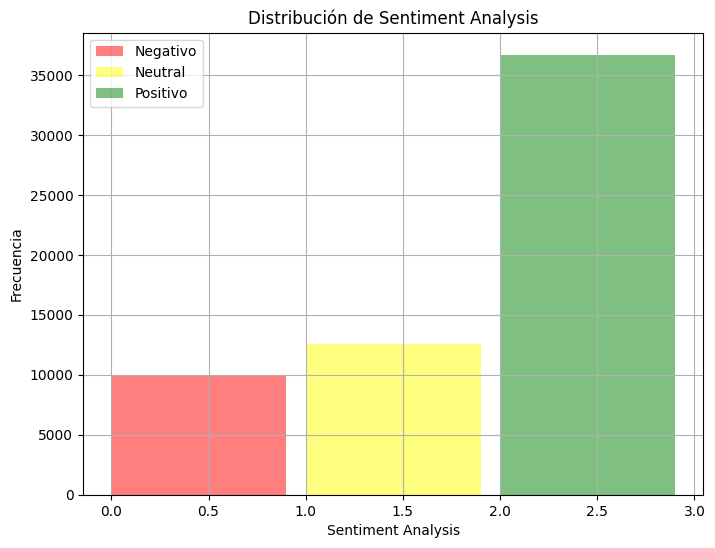

In [13]:
# Mapeo de valores a etiquetas y colores
mapping = {0: 'Negativo', 1: 'Neutral', 2: 'Positivo'}
colors = {0: 'red', 1: 'yellow', 2: 'green'}

# Crear histograma con colores y leyenda
plt.figure(figsize=(8, 6))
for value, color in colors.items():
    plt.hist(df[df['sentiment_analysis'] == value]['sentiment_analysis'],
             bins=[value, value + 0.9],
             color=color,
             alpha=0.5,
             label=mapping[value])

plt.xlabel('Sentiment Analysis')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numeric_cols:
    z_scores = stats.zscore(df[col])
    outlier_indices = np.abs(z_scores) > 3  
    outliers = df[outlier_indices]
    print(f"Valores atípicos para '{col}':")
    print(outliers)
    print()

Valores atípicos para 'sentiment_analysis':
Empty DataFrame
Columns: [item_id, helpful, recommend, review, new_posted, sentiment_analysis]
Index: []



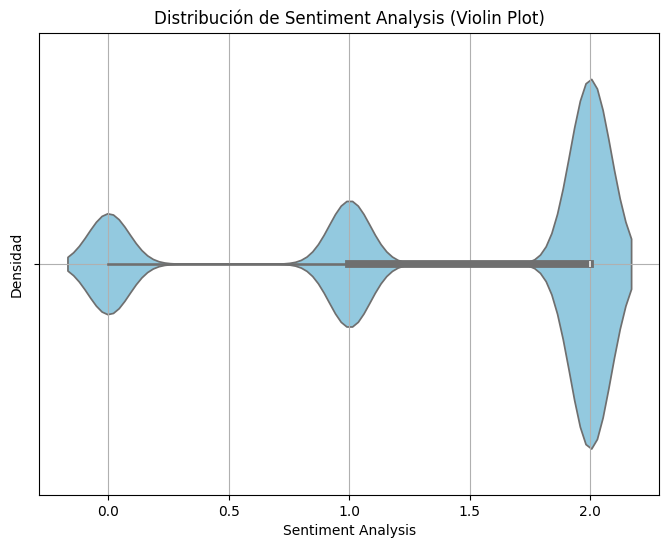

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['sentiment_analysis'], color='skyblue')
plt.xlabel('Sentiment Analysis')
plt.ylabel('Densidad')
plt.title('Distribución de Sentiment Analysis (Violin Plot)')

plt.grid(True)
plt.show()